# Implementación para el Dataset XOR

Epoch 0, Loss: 0.2642429652003604
Epoch 10, Loss: 0.25876446150004223
Epoch 20, Loss: 0.25392243191044256
Epoch 30, Loss: 0.249551557374671
Epoch 40, Loss: 0.24551241485841274
Epoch 50, Loss: 0.24169573037224523
Epoch 60, Loss: 0.23801289113388693
Epoch 70, Loss: 0.23438796379440766
Epoch 80, Loss: 0.2307617688894599
Epoch 90, Loss: 0.22708618917507412
Epoch 100, Loss: 0.22332253027796545
Epoch 110, Loss: 0.21944173881631127
Epoch 120, Loss: 0.21542363987015964
Epoch 130, Loss: 0.21125698767679651
Epoch 140, Loss: 0.20716422883187588
Epoch 150, Loss: 0.20402219494301704
Epoch 160, Loss: 0.2010958287125916
Epoch 170, Loss: 0.19816704462222634
Epoch 180, Loss: 0.19532213771613177
Epoch 190, Loss: 0.19258439582888054
Epoch 200, Loss: 0.1899353673680506
Epoch 210, Loss: 0.1873376848773428
Epoch 220, Loss: 0.18450590981088705
Epoch 230, Loss: 0.1819148255423888
Epoch 240, Loss: 0.17900404395005456
Epoch 250, Loss: 0.17598329345975414
Epoch 260, Loss: 0.17286698163743128
Epoch 270, Loss: 0.1

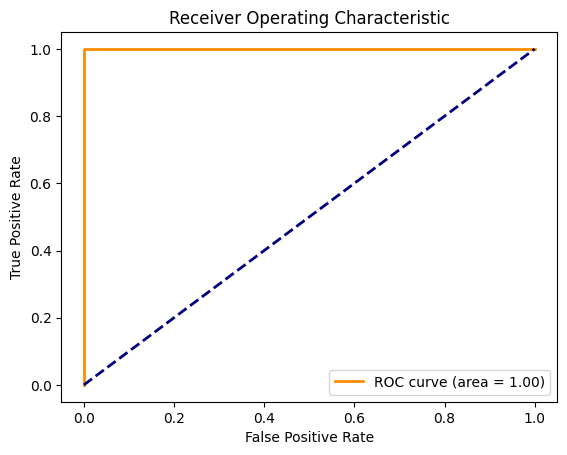

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import Sigmoid, ReLU
from neural_network.NeuralNetwork import NeuralNetwork

# Generación de datos XOR
def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    return X, y

# Crear y entrenar la red neuronal
X, y = generate_xor_data()
network = NeuralNetwork(DenseLayer(2, 4), ReLU(), DenseLayer(4, 1), Sigmoid())
network.train(X, y, epochs=10000, learning_rate=0.1)

# Función para graficar la curva ROC
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Realizar predicciones y evaluar
predictions = network.predict(X)
predictions_rounded = np.round(predictions)

# Matriz de confusión y reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y.flatten(), predictions_rounded.flatten()))
print("\nReporte de Clasificación:")
print(classification_report(y.flatten(), predictions_rounded.flatten()))

# Graficar la curva ROC
plot_roc_curve(y.flatten(), predictions.flatten())

# Datos MNIST

Epoch 0, Loss: nan
Epoch 0, Loss: nan
Epoch 0, Loss: nan
Epoch 1, Loss: nan
Epoch 0, Loss: nan
Epoch 2, Loss: nan
Epoch 0, Loss: nan
Epoch 3, Loss: nan
Epoch 0, Loss: nan
Epoch 4, Loss: nan
Epoch 0, Loss: nan
Epoch 5, Loss: nan
Epoch 0, Loss: nan
Epoch 6, Loss: nan
Epoch 0, Loss: nan
Epoch 7, Loss: nan
Epoch 0, Loss: nan
Epoch 8, Loss: nan
Epoch 0, Loss: nan
Epoch 9, Loss: nan
Epoch 0, Loss: nan
Epoch 10, Loss: nan
Epoch 0, Loss: nan
Epoch 11, Loss: nan
Epoch 0, Loss: nan
Epoch 12, Loss: nan
Epoch 0, Loss: nan
Epoch 13, Loss: nan
Epoch 0, Loss: nan
Epoch 14, Loss: nan
Epoch 0, Loss: nan
Epoch 15, Loss: nan
Epoch 0, Loss: nan
Epoch 16, Loss: nan
Epoch 0, Loss: nan
Epoch 17, Loss: nan
Epoch 0, Loss: nan
Epoch 18, Loss: nan
Epoch 0, Loss: nan
Epoch 19, Loss: nan
Epoch 0, Loss: nan
Epoch 20, Loss: nan
Epoch 0, Loss: nan
Epoch 21, Loss: nan
Epoch 0, Loss: nan
Epoch 22, Loss: nan
Epoch 0, Loss: nan
Epoch 23, Loss: nan
Epoch 0, Loss: nan
Epoch 24, Loss: nan
Epoch 0, Loss: nan
Epoch 25, Loss: 

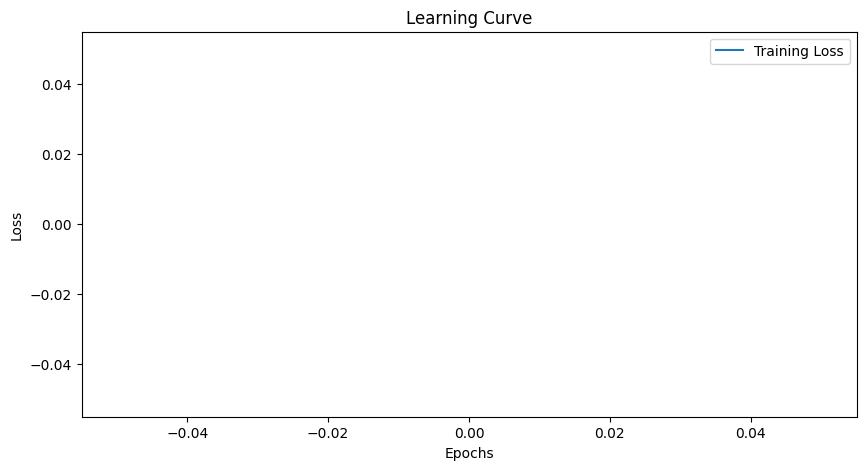

Predicciones del test: [7 2 1 ... 4 5 6]


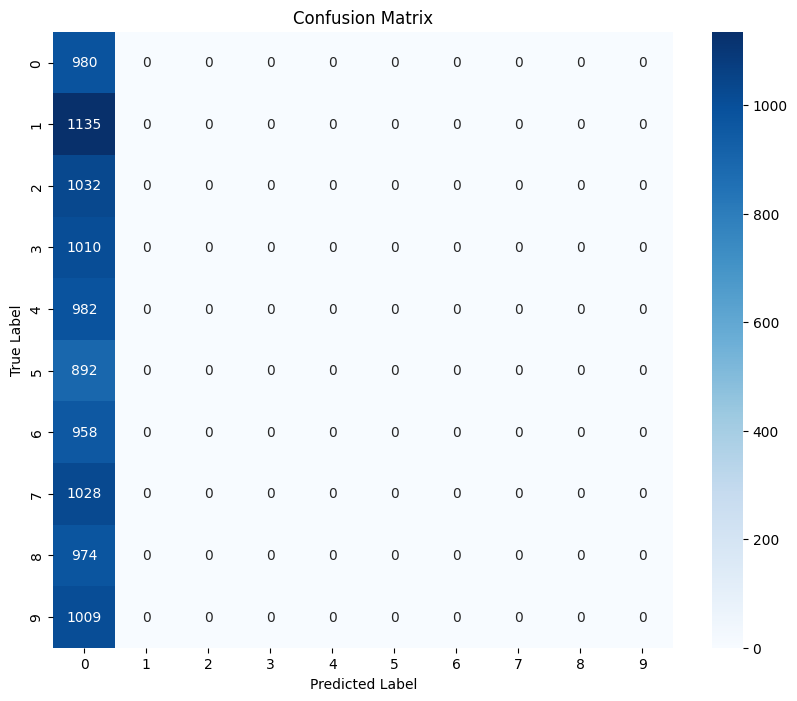

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU, Softmax
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.LossFunctions import CrossEntropy
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos MNIST
def load_mnist_data():
    train_data = pd.read_csv('mnist_train.csv')
    test_data = pd.read_csv('mnist_test.csv')
    return train_data, test_data

# Preparar los datos
def prepare_data(data):
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values / 255.0  # Normalizar
    # Convertir las etiquetas a one-hot encoding
    y_one_hot = np.zeros((y.size, y.max()+1))
    y_one_hot[np.arange(y.size), y] = 1
    return X, y_one_hot

train_data, test_data = load_mnist_data()
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)

# Crear la red neuronal
network = NeuralNetwork(
    DenseLayer(784, 128),
    ReLU(),
    DenseLayer(128, 64),
    ReLU(),
    DenseLayer(64, 10),
    Softmax())

# Para almacenar el historial de pérdida para graficar la curva de aprendizaje
loss_history = []

# Modificar el método train para registrar la pérdida en cada época
def train_and_evaluate(network, X_train, y_train, X_test, y_test, epochs, learning_rate):
    for epoch in range(epochs):
        network.train(X_train, y_train, epochs=1, learning_rate=learning_rate, loss='crossentropy')
        predicted = network.predict(X_train)
        loss = network.compute_loss(predicted, y_train, 'crossentropy')
        loss_history.append(loss)
        print(f'Epoch {epoch}, Loss: {loss}')
        
# Entrenamiento y evaluación
train_and_evaluate(network, X_train, y_train, X_test, y_test, epochs=50, learning_rate=0.1)

# Gráfica de la curva de aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Hacer predicciones y evaluar
predictions = network.predict(X_test)
predictions_rounded = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convertir de one-hot a etiquetas
print("Predicciones del test:",y_test_labels)
# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test_labels, predictions_rounded)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()